In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
data = pd.read_csv('data_set_1.csv',parse_dates = ['created_on'])
data.head()

,case_id,trip_id,patient_id,created_on,generated_by,agent_type,city,case_type,case_status,trip_status,...,trip_fare_agreed,cost_to_owner,hospital_margin,ambulance_id,ambulance_company_id,ambulance_ownership,cancellation_amount_hospital,cancellation_amount_operator,trip_type,service_type
0,BLRE210417-00192,1131257.0,CUST1207146,2021-04-17 14:10:00,Abhishek,Call Center,BLR,BOOKING,COMPLETED,COMPLETED,...,60000,0.0,60000.0,HYDL100A060,HYDL100,Owned,0.0,0.0,Intra-Hosp,NaN
1,BLRE210430-00205,1135664.0,CUST1215994,2021-04-30 16:51:00,Nikhil,Call Center,BLR,BOOKING,COMPLETED,COMPLETED,...,20000,15000.0,5000.0,HYDC164A001,HYDC164,Partner,0.0,0.0,Intra-Hosp,NaN
2,BLRE210909-00069,1159203.0,CUST1259169,2021-09-09 14:19:00,Salman,Call Center,BLR,BOOKING,CANCELLED,CANCELLED,...,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inbound,NaN
3,BLRE220119-00186,1183497.0,CUST1264299,2022-01-19 16:52:00,Sharukh,HO,BLR,BOOKING,CANCELLED,CANCELLED,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intra-Hosp,Ambulance - Standard
4,BLRE220119-00187,1183498.0,CUST1264299,2022-01-19 16:56:00,Sharukh,HO,BLR,BOOKING,CANCELLED,CANCELLED,...,1,0.0,1.0,BLRX003,BLRX003,Partner,0.0,0.0,Intra-Hosp,Ambulance - Standard


In [3]:
data.dtypes

case_id                                     object
trip_id                                    float64
patient_id                                  object
created_on                          datetime64[ns]
generated_by                                object
agent_type                                  object
city                                        object
case_type                                   object
case_status                                 object
trip_status                                 object
ambulance_status                            object
medical_cause                               object
emergency                                   object
bill_to_hospital                            object
source_name                                 object
ambulance_type_requested                    object
ambulance_type_sent                         object
pickup_latitude                            float64
pickup_longitude                           float64
drop_latitude                  

In [4]:
df = data

In [5]:
df.isnull().sum()

case_id                                0
trip_id                                5
patient_id                             0
created_on                             0
generated_by                           0
agent_type                             7
city                                   0
case_type                              0
case_status                            0
trip_status                            5
ambulance_status                     924
medical_cause                          0
emergency                              0
bill_to_hospital                       0
source_name                            0
ambulance_type_requested               5
ambulance_type_sent                    0
pickup_latitude                        7
pickup_longitude                       7
drop_latitude                          7
drop_longitude                         7
standby_latitude                    5824
standby_longitude                   5824
estimated_distance_to_pickup_kms    1779
estimated_time_t

In [6]:
df.drop(columns = ['case_id', 'trip_id', 'patient_id','pickup_latitude', 'pickup_longitude', 'drop_latitude',
       'drop_longitude', 'standby_latitude', 'standby_longitude'],inplace = True)

In [7]:
df.isnull().sum()

created_on                             0
generated_by                           0
agent_type                             7
city                                   0
case_type                              0
case_status                            0
trip_status                            5
ambulance_status                     924
medical_cause                          0
emergency                              0
bill_to_hospital                       0
source_name                            0
ambulance_type_requested               5
ambulance_type_sent                    0
estimated_distance_to_pickup_kms    1779
estimated_time_to_pickup_mins       1779
trip_distance_kms                      5
system_fare                            0
fare_proposed                          0
trip_fare_agreed                       0
cost_to_owner                        924
hospital_margin                      924
ambulance_id                         924
ambulance_company_id                 924
ambulance_owners

In [8]:
for i in df.drop(columns=['created_on']).columns:
    if df[i].dtype=='O':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace = True)
        
    

In [9]:
df.isnull().sum()

created_on                          0
generated_by                        0
agent_type                          0
city                                0
case_type                           0
case_status                         0
trip_status                         0
ambulance_status                    0
medical_cause                       0
emergency                           0
bill_to_hospital                    0
source_name                         0
ambulance_type_requested            0
ambulance_type_sent                 0
estimated_distance_to_pickup_kms    0
estimated_time_to_pickup_mins       0
trip_distance_kms                   0
system_fare                         0
fare_proposed                       0
trip_fare_agreed                    0
cost_to_owner                       0
hospital_margin                     0
ambulance_id                        0
ambulance_company_id                0
ambulance_ownership                 0
cancellation_amount_hospital        0
cancellation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   created_on                        5826 non-null   datetime64[ns]
 1   generated_by                      5826 non-null   object        
 2   agent_type                        5826 non-null   object        
 3   city                              5826 non-null   object        
 4   case_type                         5826 non-null   object        
 5   case_status                       5826 non-null   object        
 6   trip_status                       5826 non-null   object        
 7   ambulance_status                  5826 non-null   object        
 8   medical_cause                     5826 non-null   object        
 9   emergency                         5826 non-null   object        
 10  bill_to_hospital                  5826 non-null 

In [11]:
df_21 = df[df['created_on'].dt.year==2021]
df_22 = df[df['created_on'].dt.year==2022]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '01 2021'),
  Text(1, 0, '02 2021'),
  Text(2, 0, '03 2021'),
  Text(3, 0, '04 2021'),
  Text(4, 0, '05 2021'),
  Text(5, 0, '06 2021'),
  Text(6, 0, '07 2021'),
  Text(7, 0, '08 2021'),
  Text(8, 0, '09 2021'),
  Text(9, 0, '10 2021'),
  Text(10, 0, '11 2021'),
  Text(11, 0, '12 2021')])

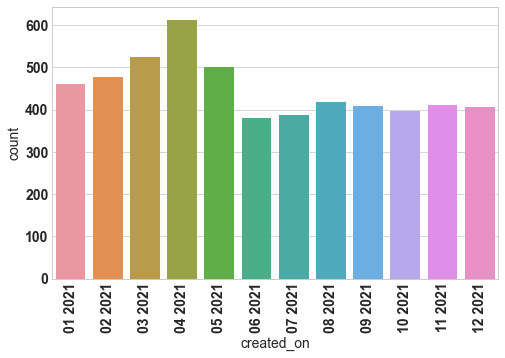

In [12]:
sns.countplot(df_21['created_on'].dt.strftime('%m %Y').sort_values())
plt.xticks(rotation = 90)

In [13]:
df_21.columns

Index(['created_on', 'generated_by', 'agent_type', 'city', 'case_type',
       'case_status', 'trip_status', 'ambulance_status', 'medical_cause',
       'emergency', 'bill_to_hospital', 'source_name',
       'ambulance_type_requested', 'ambulance_type_sent',
       'estimated_distance_to_pickup_kms', 'estimated_time_to_pickup_mins',
       'trip_distance_kms', 'system_fare', 'fare_proposed', 'trip_fare_agreed',
       'cost_to_owner', 'hospital_margin', 'ambulance_id',
       'ambulance_company_id', 'ambulance_ownership',
       'cancellation_amount_hospital', 'cancellation_amount_operator',
       'trip_type', 'service_type'],
      dtype='object')

In [14]:
df_21_num = df_21.select_dtypes(include = np.number)

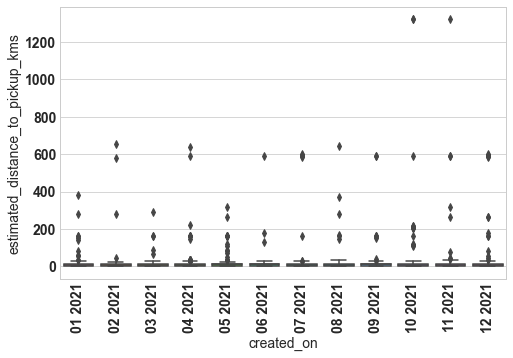

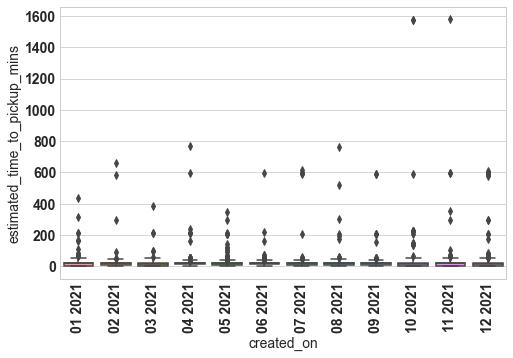

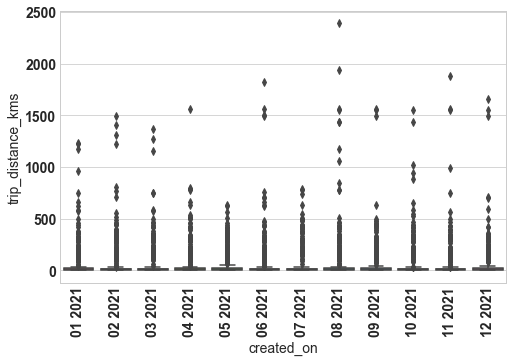

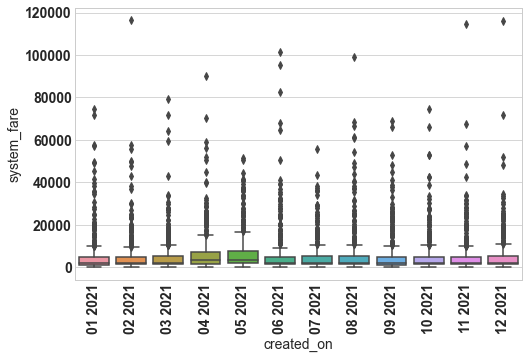

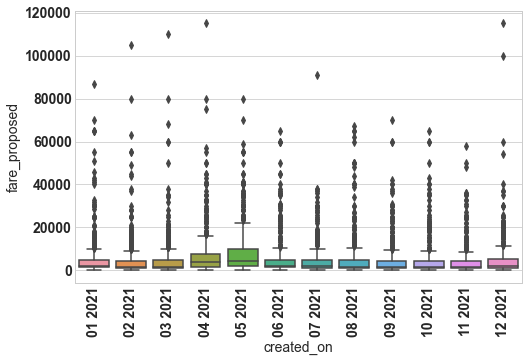

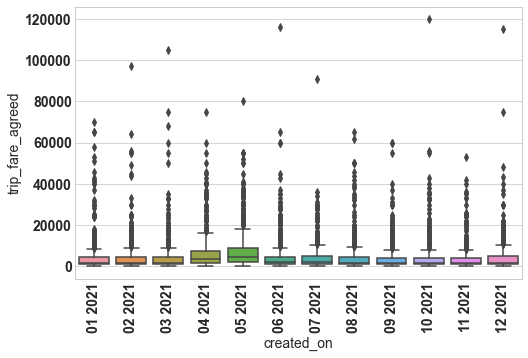

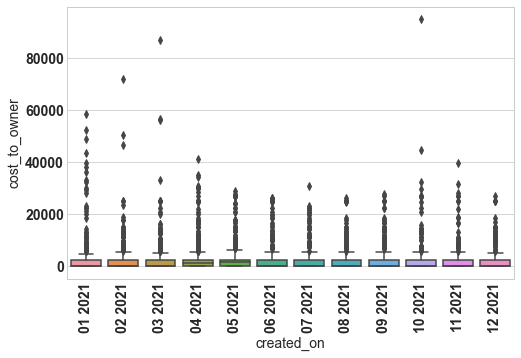

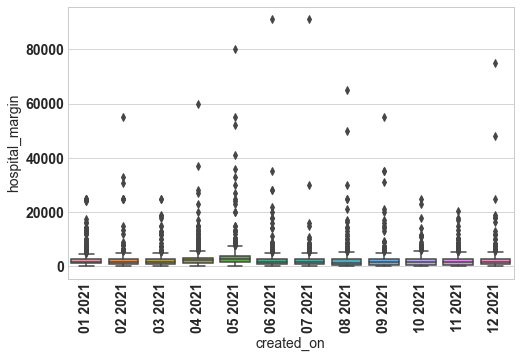

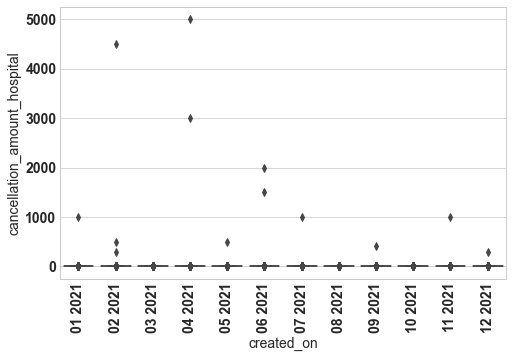

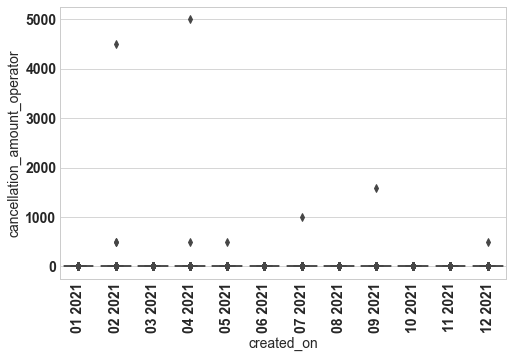

In [15]:
for i in df_21_num.columns:
    sns.boxplot(df_21['created_on'].dt.strftime('%m %Y').sort_values(),df_21[i])
    plt.xticks(rotation = 90)
    plt.show()

DIFFERENT Months vs  estimated_distance_to_pickup_kms


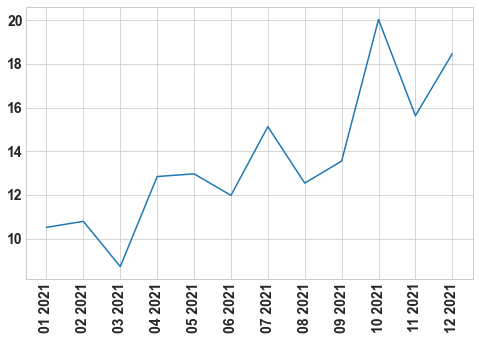

DIFFERENT Months vs  estimated_time_to_pickup_mins


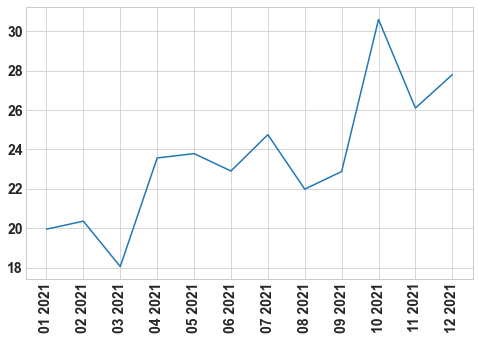

DIFFERENT Months vs  trip_distance_kms


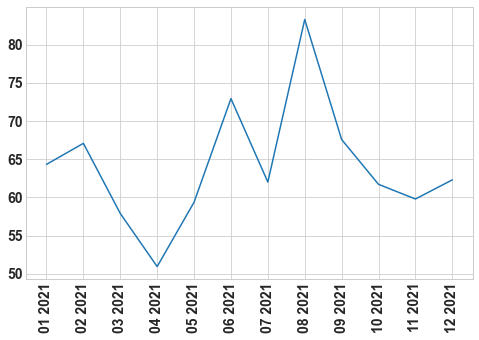

DIFFERENT Months vs  system_fare


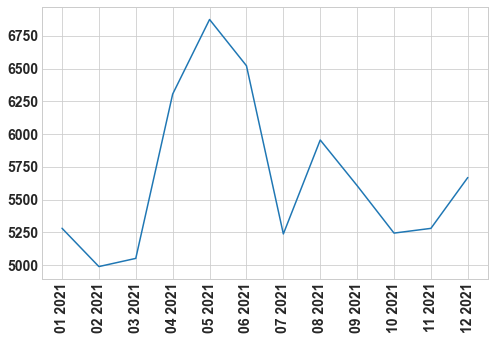

DIFFERENT Months vs  fare_proposed


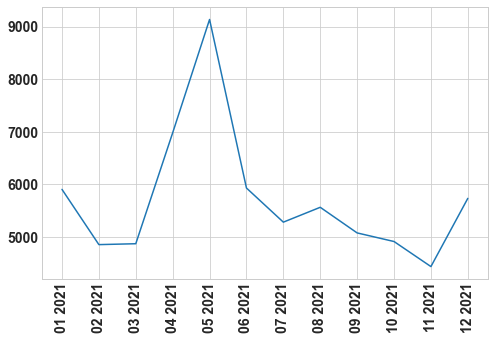

DIFFERENT Months vs  trip_fare_agreed


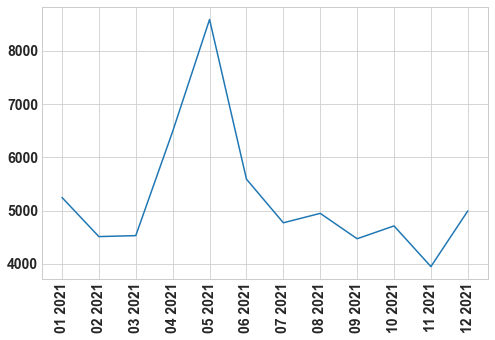

DIFFERENT Months vs  cost_to_owner


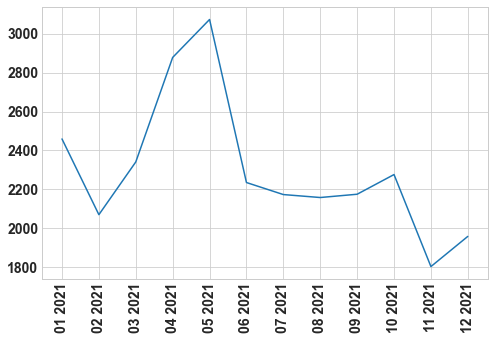

DIFFERENT Months vs  hospital_margin


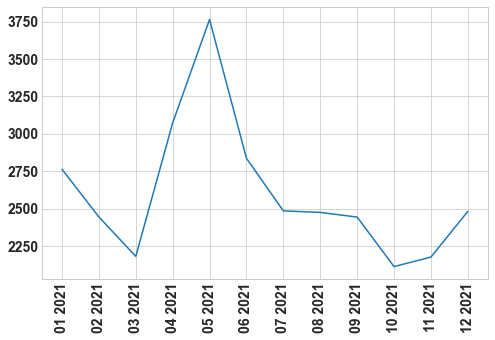

DIFFERENT Months vs  cancellation_amount_hospital


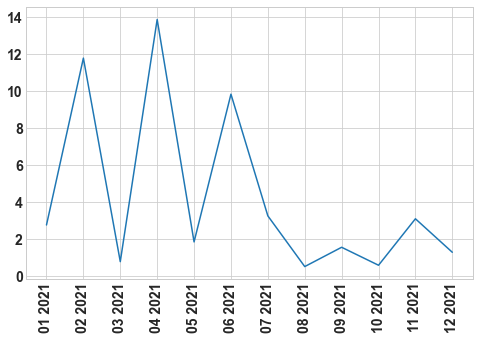

DIFFERENT Months vs  cancellation_amount_operator


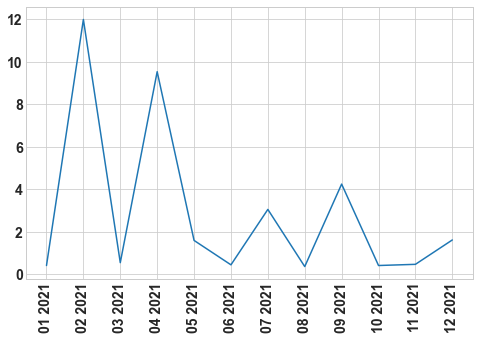

In [16]:
for i in df_21_num.columns:
    plt.plot(df_21.groupby(df_21['created_on'].dt.strftime('%m %Y'))[i].mean())
    plt.xticks(rotation = 90)
    print('DIFFERENT Months vs ',i)
    plt.show()

In [17]:
df_21_num.columns

Index(['estimated_distance_to_pickup_kms', 'estimated_time_to_pickup_mins',
       'trip_distance_kms', 'system_fare', 'fare_proposed', 'trip_fare_agreed',
       'cost_to_owner', 'hospital_margin', 'cancellation_amount_hospital',
       'cancellation_amount_operator'],
      dtype='object')

In [18]:
df_21['Revenue_Earned'] = df_21['trip_fare_agreed']+df_21['system_fare']-df_21['cost_to_owner']
+df_21['hospital_margin']+df_21['cancellation_amount_hospital']+df['cancellation_amount_operator']

0       60000.000000
1        5000.000000
2        2624.660241
3                NaN
4                NaN
            ...     
5821     2624.660241
5822     2624.660241
5823     2624.660241
5824    11400.000000
5825     2624.660241
Length: 5826, dtype: float64

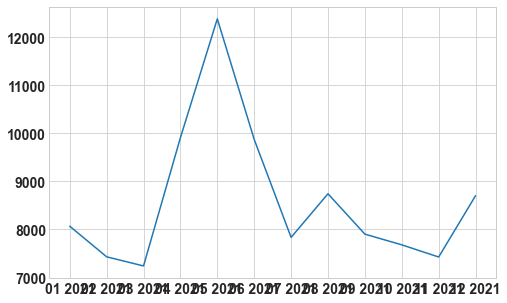

In [19]:
plt.plot(df_21.groupby(df_21['created_on'].dt.strftime('%m %Y'))['Revenue_Earned'].mean())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

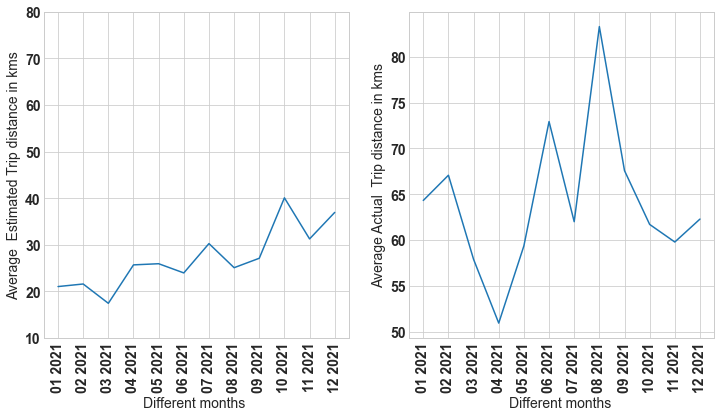

In [20]:
f= plt.figure(figsize=(12,6))

ax=f.add_subplot(121)
plt.plot(df_21.groupby(df_21['created_on'].dt.strftime('%m %Y'))['estimated_distance_to_pickup_kms'].mean()*2)
plt.xlabel('Different months ')
plt.ylabel('Average  Estimated Trip distance in kms')
plt.ylim(10,80)
plt.xticks(rotation = 90)

ax=f.add_subplot(122)
plt.plot(df_21.groupby(df_21['created_on'].dt.strftime('%m %Y'))['trip_distance_kms'].mean())
plt.xlabel('Different months ')
plt.ylabel('Average Actual  Trip distance in kms')
plt.xticks(rotation = 90)


##### The estimated distance  vs the actucal distance of the trip had a huge difference. This could be because the inappropriate location of  pikup point . This difference there in , craetes am overhead expense of travel which is not being accounted.The below graphs show the same 

In [21]:
df_21.columns

Index(['created_on', 'generated_by', 'agent_type', 'city', 'case_type',
       'case_status', 'trip_status', 'ambulance_status', 'medical_cause',
       'emergency', 'bill_to_hospital', 'source_name',
       'ambulance_type_requested', 'ambulance_type_sent',
       'estimated_distance_to_pickup_kms', 'estimated_time_to_pickup_mins',
       'trip_distance_kms', 'system_fare', 'fare_proposed', 'trip_fare_agreed',
       'cost_to_owner', 'hospital_margin', 'ambulance_id',
       'ambulance_company_id', 'ambulance_ownership',
       'cancellation_amount_hospital', 'cancellation_amount_operator',
       'trip_type', 'service_type', 'Revenue_Earned'],
      dtype='object')

In [22]:
df_21['Total_cancellation'] = df_21['cancellation_amount_hospital']+df_21['cancellation_amount_operator']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

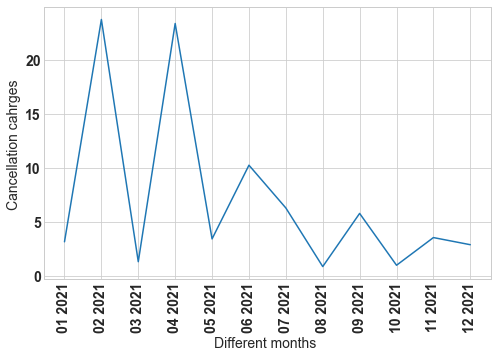

In [23]:
plt.plot(df_21.groupby(df_21['created_on'].dt.strftime('%m %Y'))['Total_cancellation'].mean())
plt.xlabel('Different months ')
plt.ylabel('Cancellation cahrges ')
plt.xticks(rotation = 90)


<AxesSubplot:xlabel='trip_distance_kms', ylabel='trip_fare_agreed'>

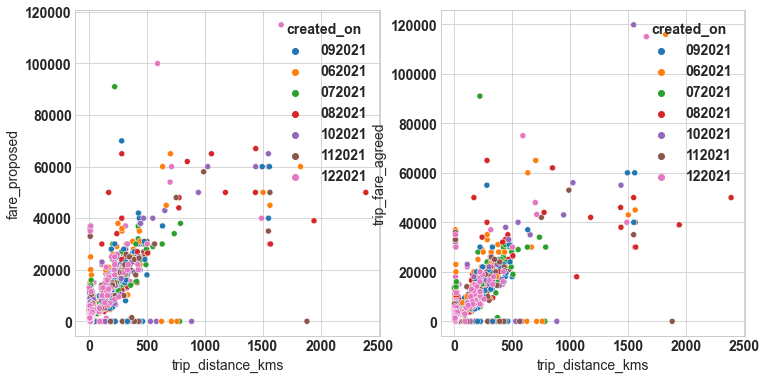

In [69]:
f= plt.figure(figsize=(12,6))

ax=f.add_subplot(121)
sns.scatterplot(df_june['trip_distance_kms'],df_june['fare_proposed'],hue = df_june['created_on'].dt.strftime('%m%Y').sort_values())

ax=f.add_subplot(122)
sns.scatterplot(df_june['trip_distance_kms'],df_june['trip_fare_agreed'],hue = df_june['created_on'].dt.strftime('%m%Y').sort_values())




In [24]:
df_21.drop(columns = ['ambulance_id'],inplace = True)

In [25]:
df_21_cat = df_21.select_dtypes(include =  'object')


In [26]:
df_21_cat.columns

Index(['generated_by', 'agent_type', 'city', 'case_type', 'case_status',
       'trip_status', 'ambulance_status', 'medical_cause', 'emergency',
       'bill_to_hospital', 'source_name', 'ambulance_type_requested',
       'ambulance_type_sent', 'ambulance_company_id', 'ambulance_ownership',
       'trip_type', 'service_type'],
      dtype='object')

In [27]:
for i in df_21_cat.columns:
    print('Different Months vs ',i)
    x = pd.crosstab(df_21['created_on'].dt.strftime('%m %Y').sort_values(),df_21[i])
    print(x)
    print('\n\n')
    

Different Months vs  generated_by
generated_by  0  Aamir  Abhishek  Akram  Anil  Azhar  Bijoy  Birender  Chawla  \
created_on                                                                      
01 2021       2      1         0      1     5      0    116         5       4   
02 2021       2      0         0      2     2      0     93         4       3   
03 2021       1      0         0      0     6      0     96         2       4   
04 2021       0      0         1      0     7      0    105         2       7   
05 2021       0      1         0      0     1      0     56         1       0   
06 2021       0      0         0      1     1      0     70         1       0   
07 2021       0      0         0      0     0      0     89         0       0   
08 2021       1      0         0      2     1      0     95         0       1   
09 2021       0      0         0      2     1      0     89         0       0   
10 2021       0      0         0      0     0      0     75         1      

bill_to_hospital   No  Yes
created_on                
01 2021           446   14
02 2021           472    5
03 2021           525    0
04 2021           596   16
05 2021           495    5
06 2021           372    9
07 2021           379    8
08 2021           408    9
09 2021           402    6
10 2021           392    4
11 2021           405    7
12 2021           397   10



Different Months vs  source_name
source_name  Hospital A
created_on             
01 2021             460
02 2021             477
03 2021             525
04 2021             612
05 2021             500
06 2021             381
07 2021             387
08 2021             417
09 2021             408
10 2021             396
11 2021             412
12 2021             407



Different Months vs  ambulance_type_requested
ambulance_type_requested  ALS  EECO  Eeco  MUV  Medtaxi  OMNI  Omni  TEMPO  \
created_on                                                                   
01 2021                    49   265    42    

ambulance_ownership  Owned  Partner
created_on                         
01 2021                348      112
02 2021                361      116
03 2021                367      158
04 2021                395      217
05 2021                346      154
06 2021                282       99
07 2021                269      118
08 2021                268      149
09 2021                272      136
10 2021                264      132
11 2021                300      112
12 2021                286      121



Different Months vs  trip_type
trip_type   Inbound  Intra-Hosp  Others  Outbound  Stationary
created_on                                                   
01 2021         118          29       8       300           5
02 2021         135          39      11       292           0
03 2021         156          32       9       323           5
04 2021         177          53      25       352           5
05 2021         134          25      10       329           2
06 2021          90         

In [33]:
at = pd.crosstab(df_21['created_on'].dt.strftime('%m %Y').sort_values(),df_21['generated_by'])

0


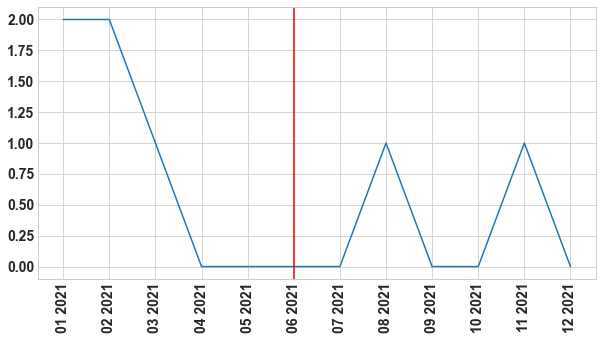


AAMIR


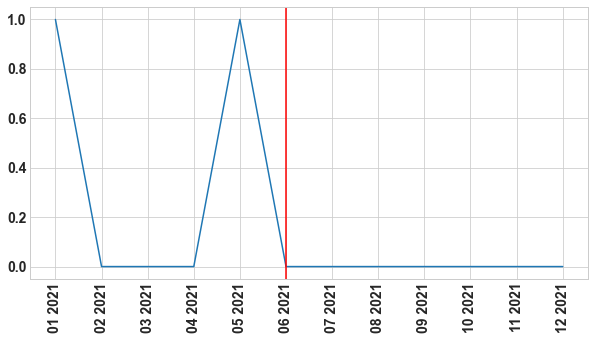


ABHISHEK


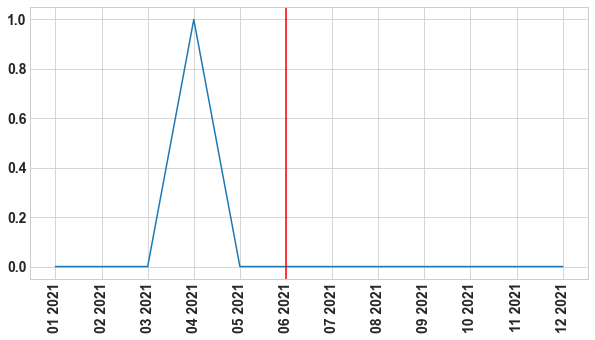


AKRAM


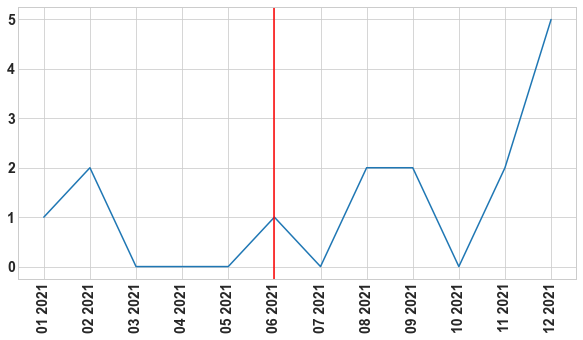


ANIL


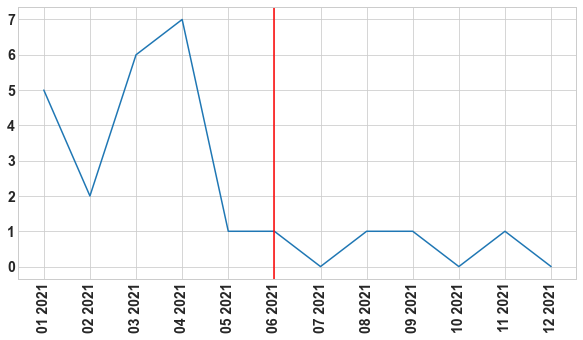


AZHAR


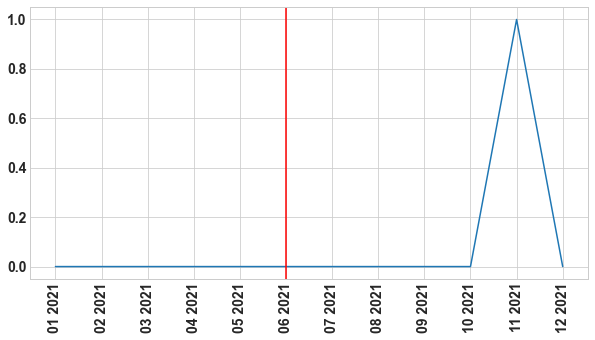


BIJOY


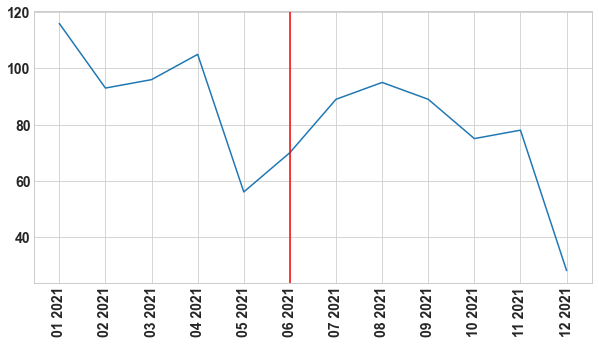


BIRENDER


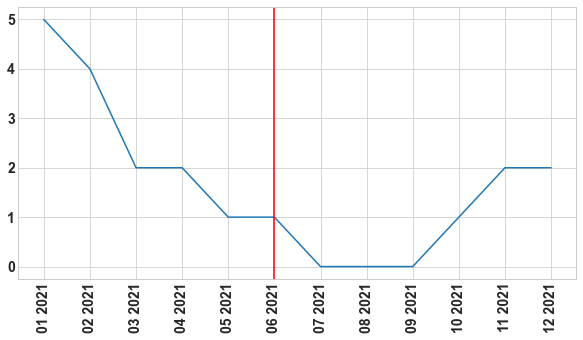


CHAWLA


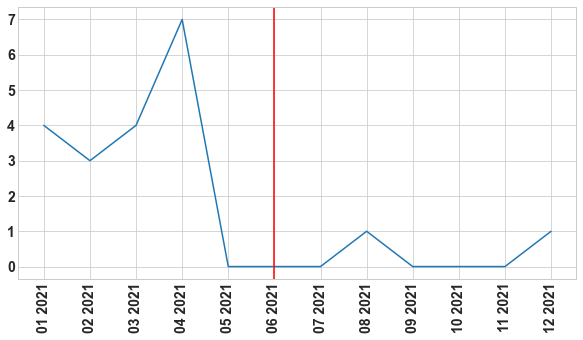


DASARI


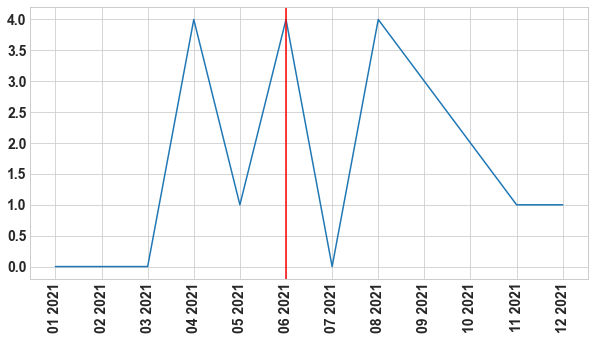


DEVEN


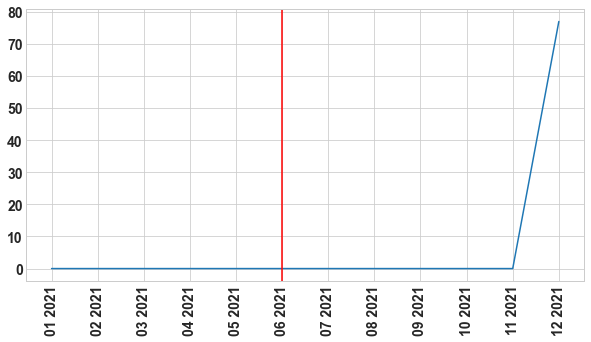


DHAVAL


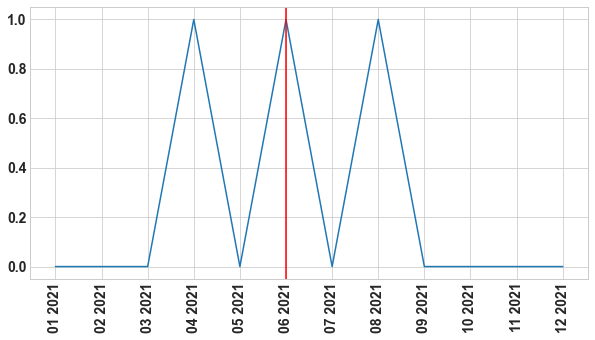


DHRUV


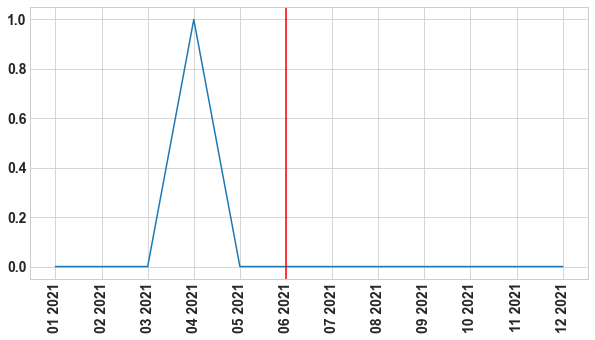


DIVYA


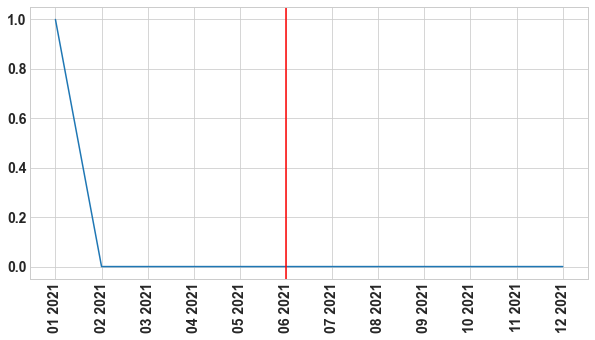


DORA


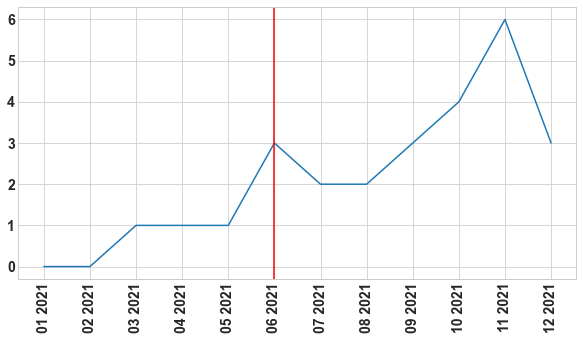


EMRAN


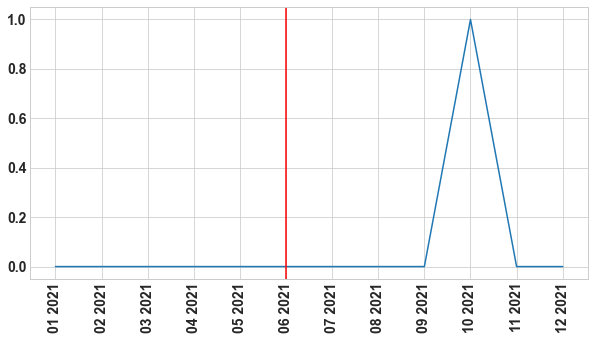


FARZAN


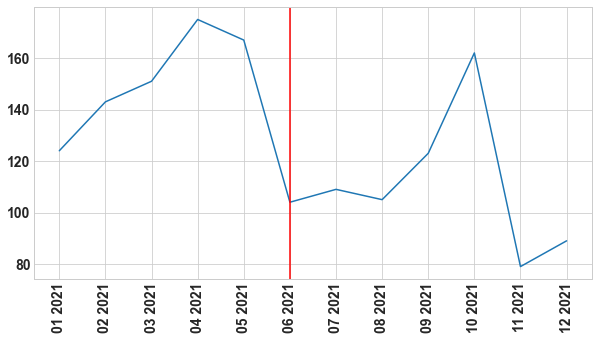


GOAL


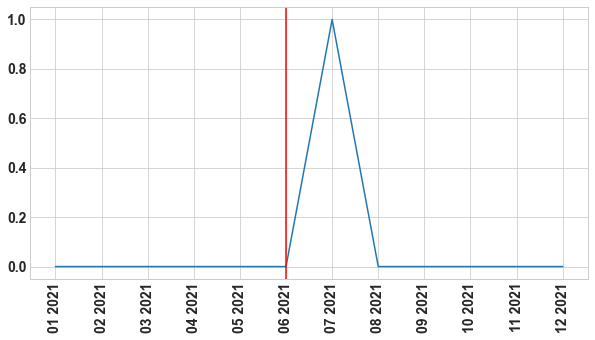


GOENKA


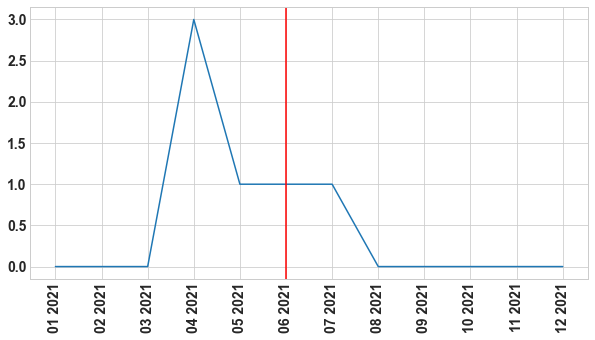


HASMI


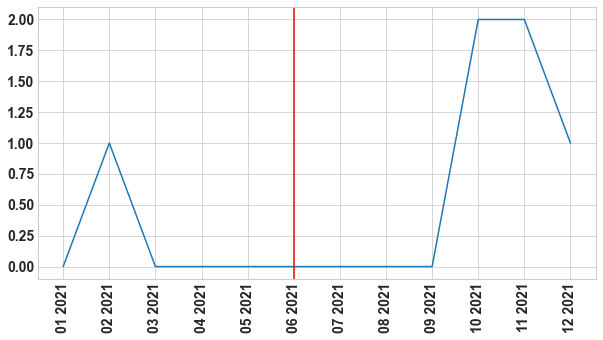


HIMANSHU


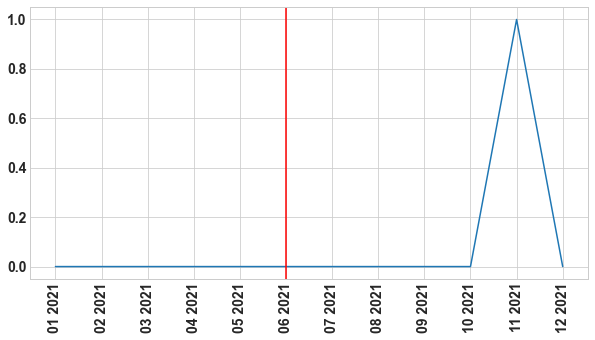


HINET


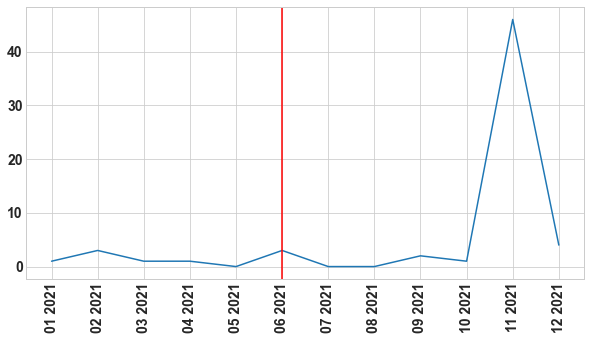


HONEY


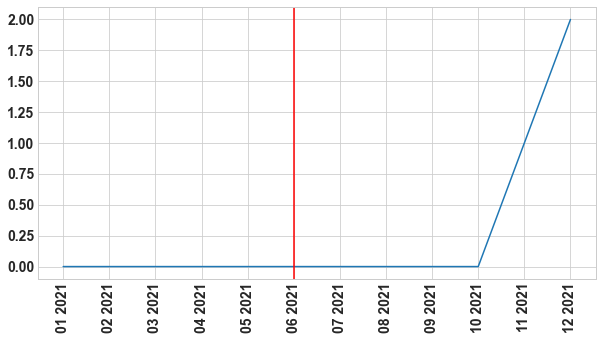


ISMAIL


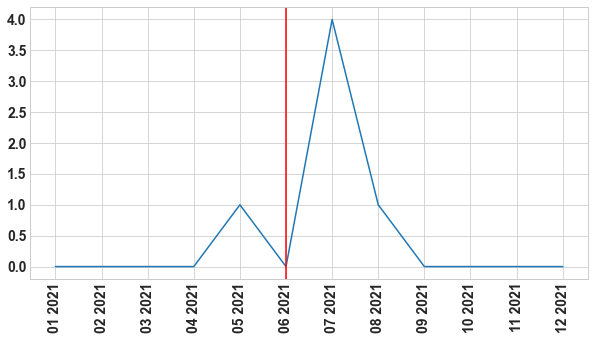


JAGDISH


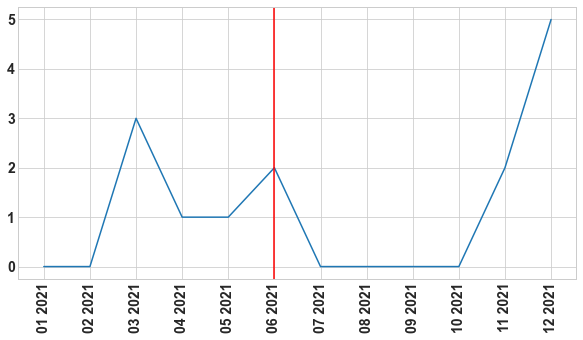


JINAL


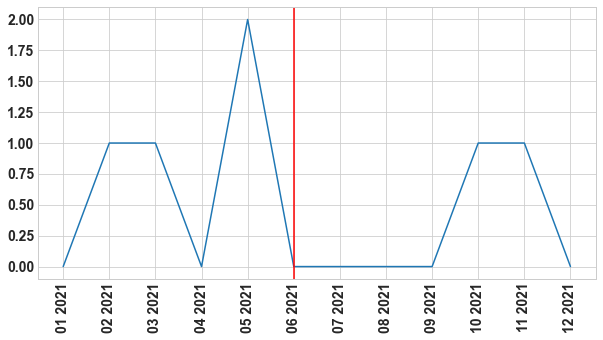


KARAN


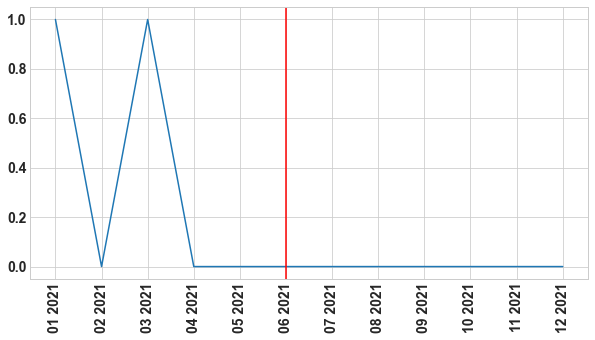


KAREENA


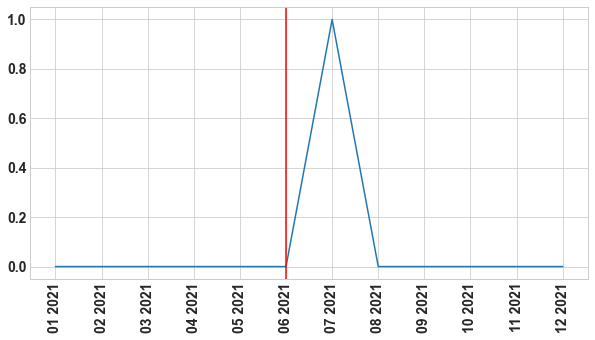


KARTIK


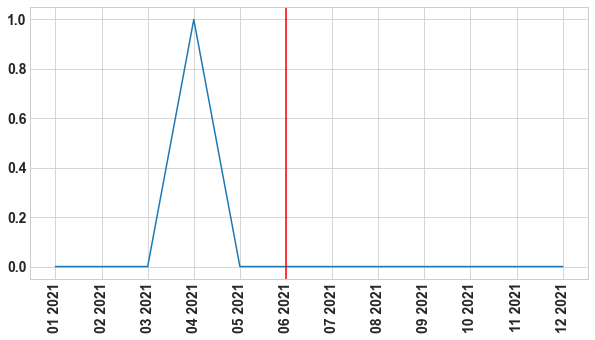


KHUSI


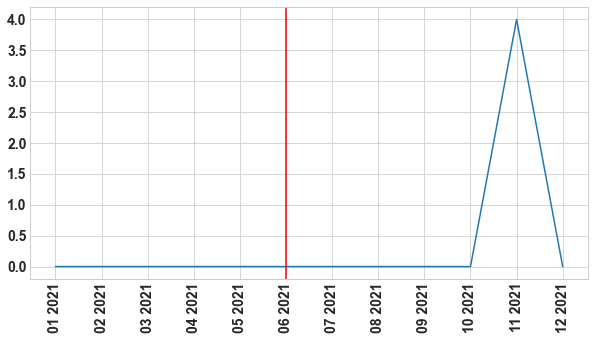


KIRTI


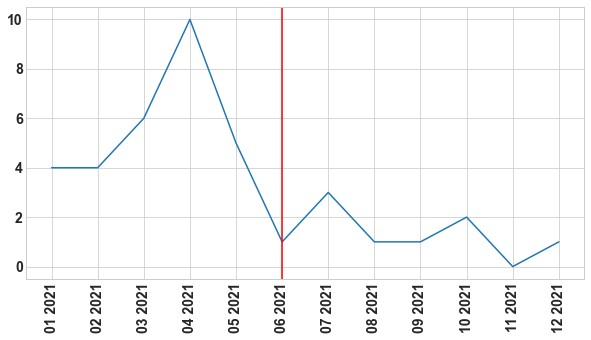


KRISHNA


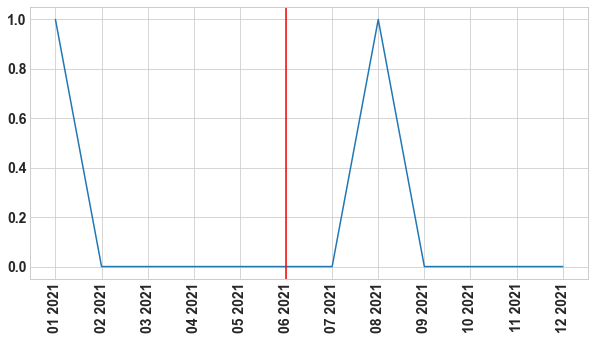


MALLA


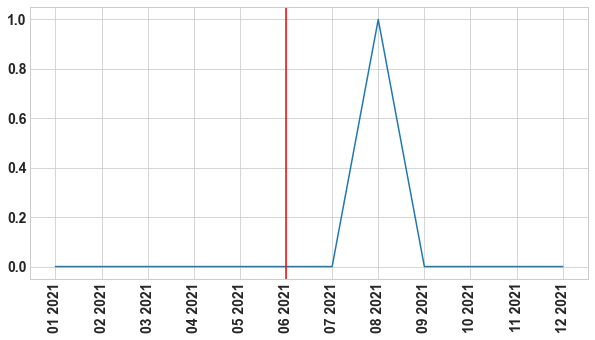


MANALI


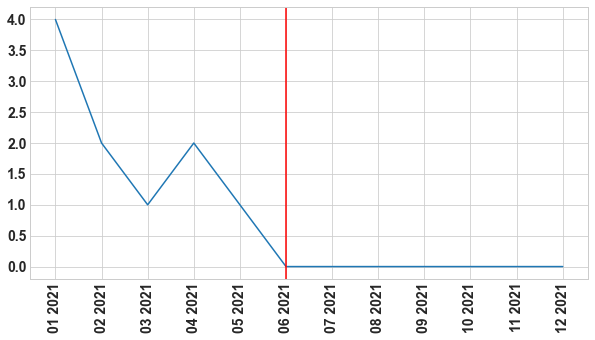


MANOHAR


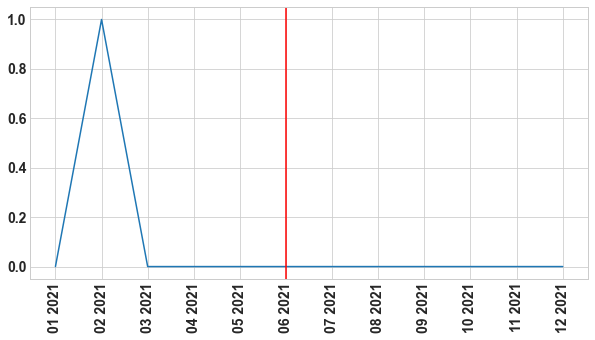


MOHAN


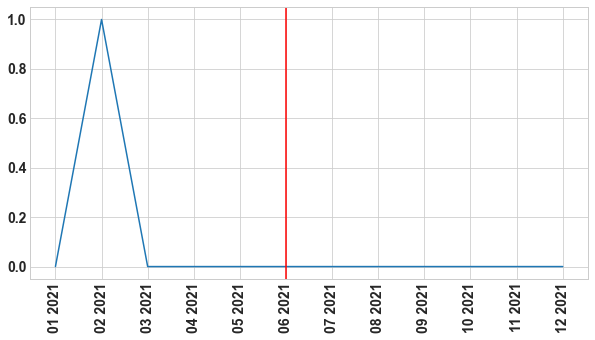


MOHD


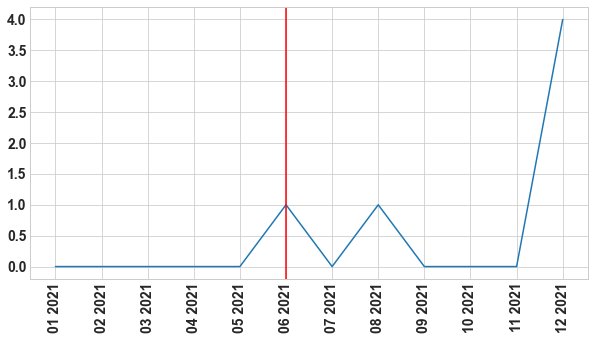


NAGRAJ


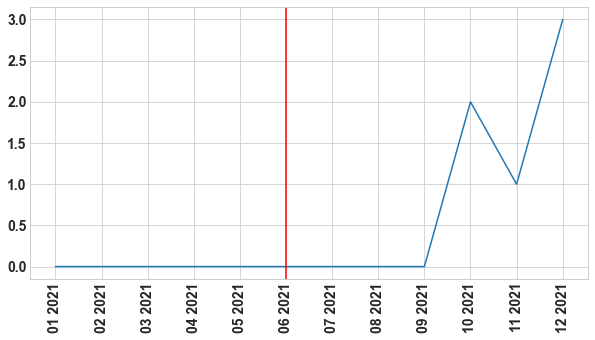


NARENDRA


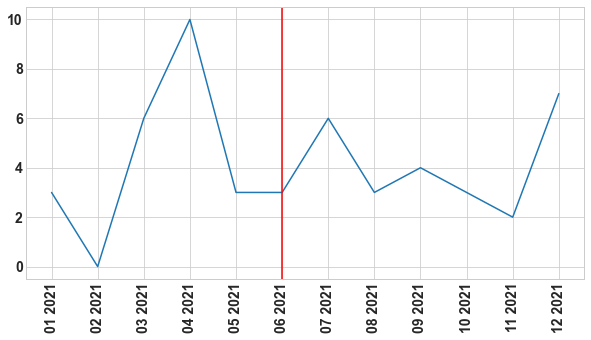


NIKHIL


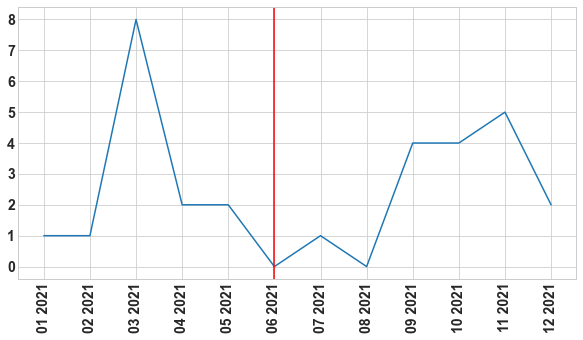


NIR


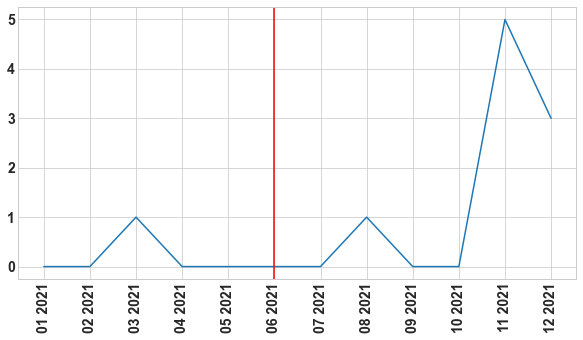


NOOR


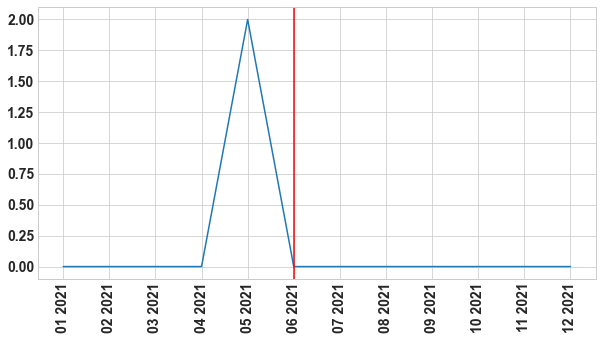


PARIT


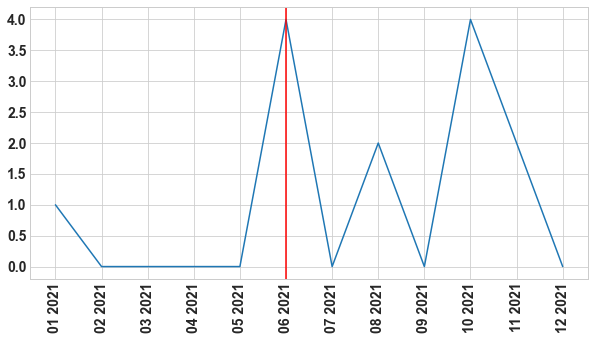


PARTH


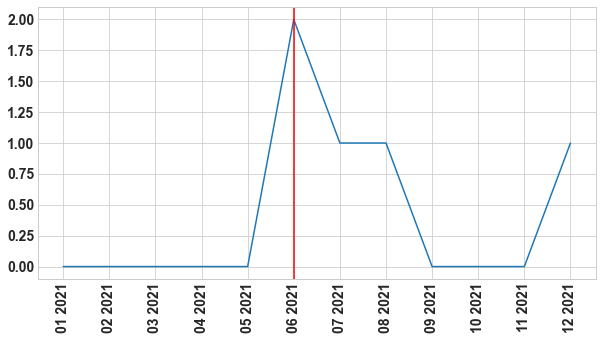


POOJA


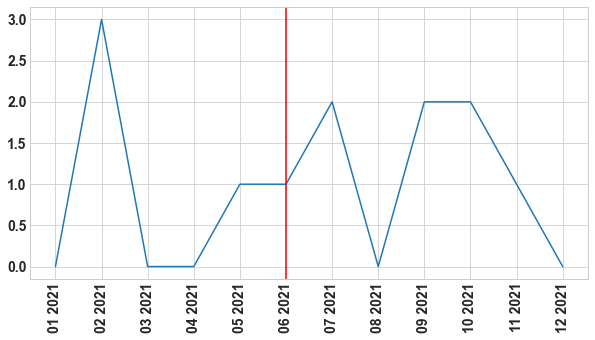


POONAM


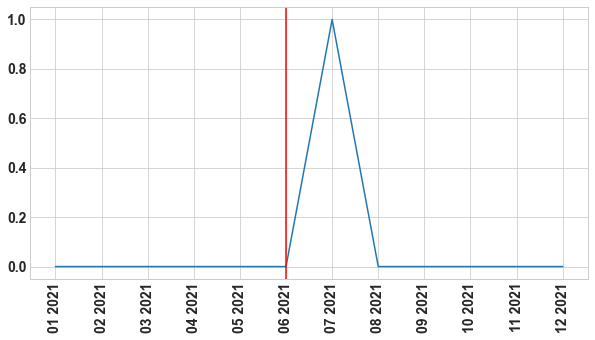


PRIYANKA


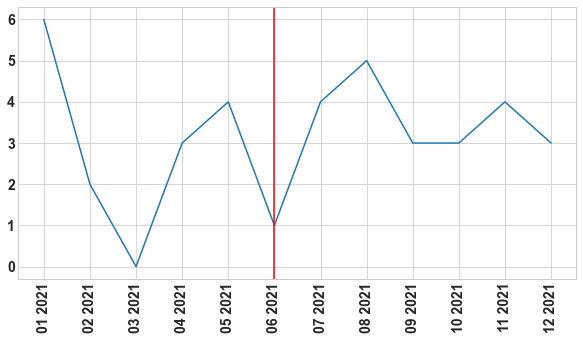


RAHUL


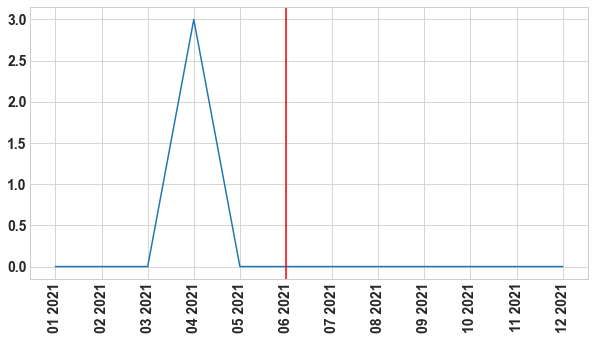


RAJU


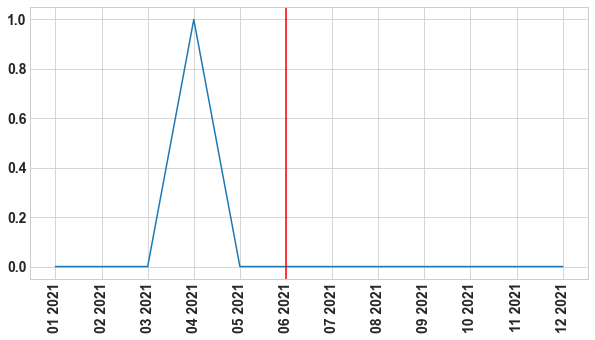


RAKUL


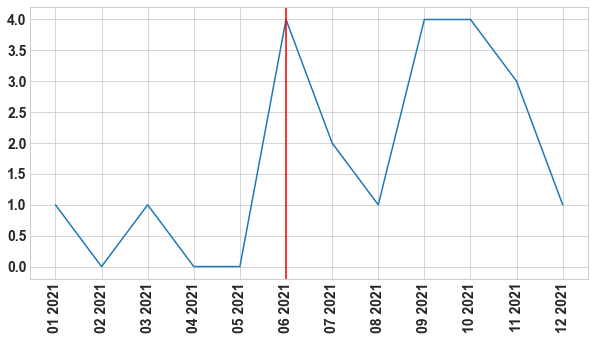


RAM


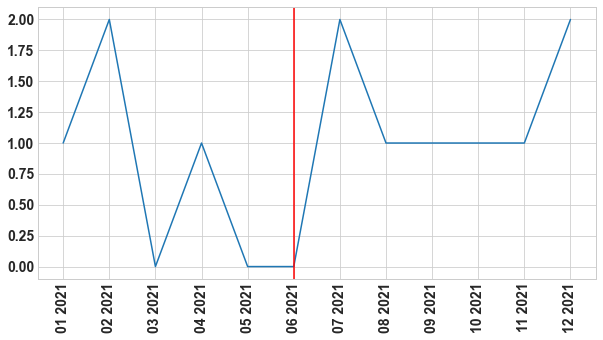


REDDY


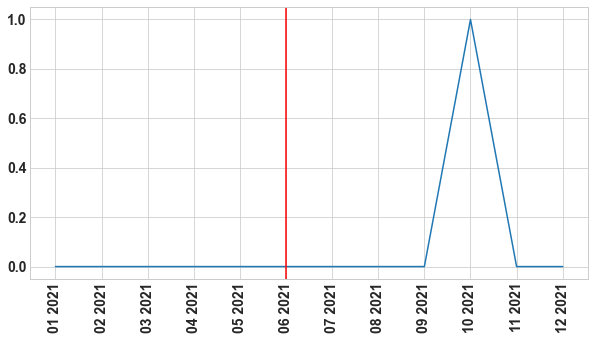


ROHIT


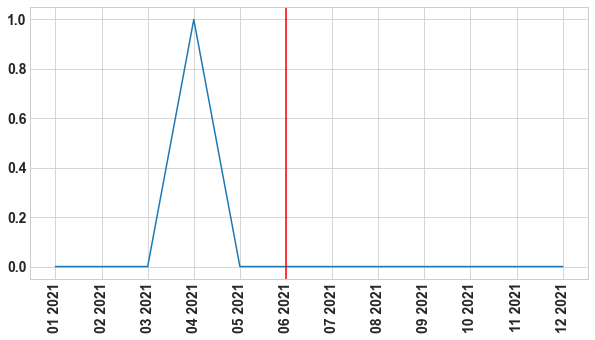


SAI


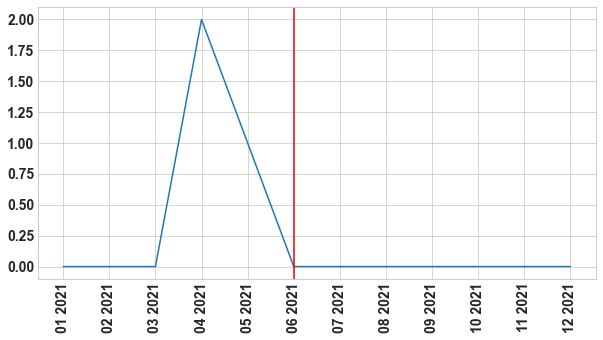


SALMAN


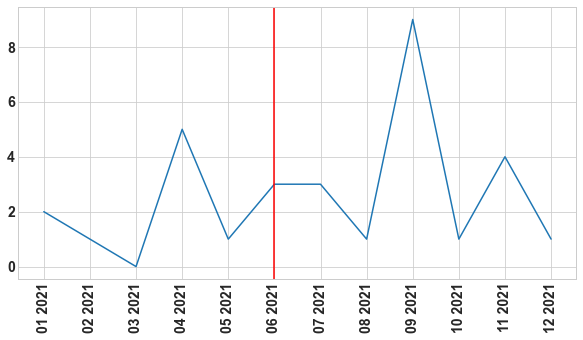


SANTOSHI


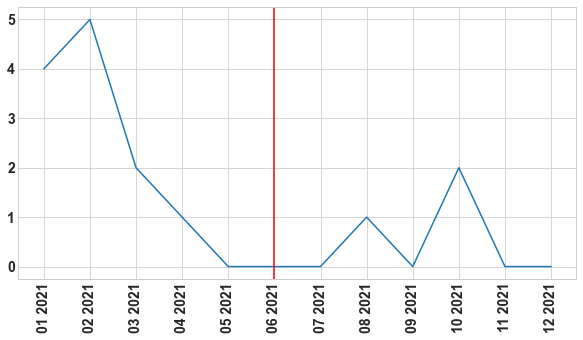


SHANTANU


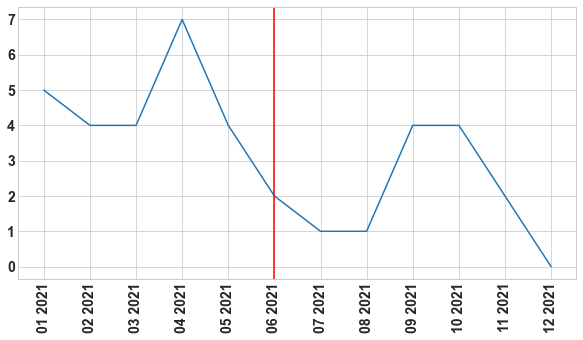


SHARMA


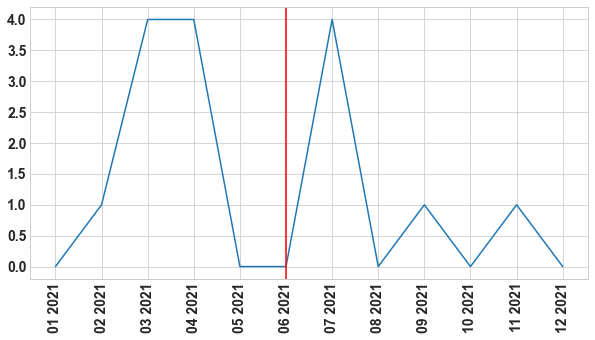


SHIVANSH


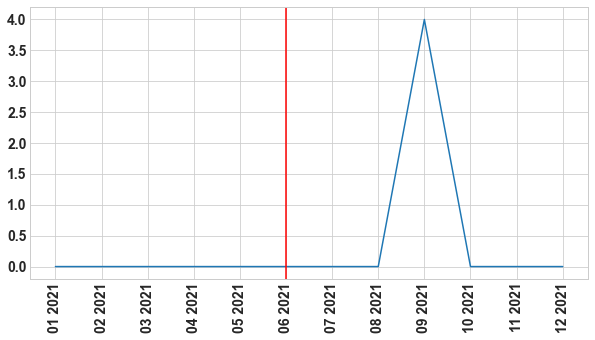


SHUBHAM


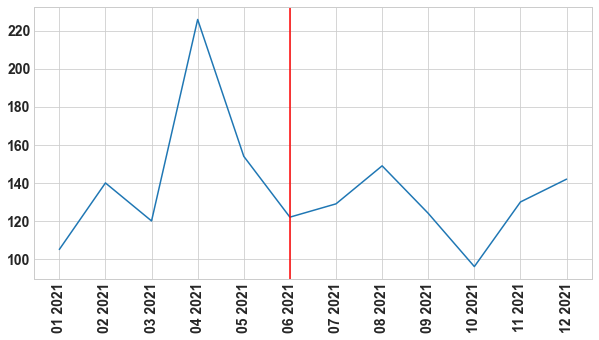


SRINU


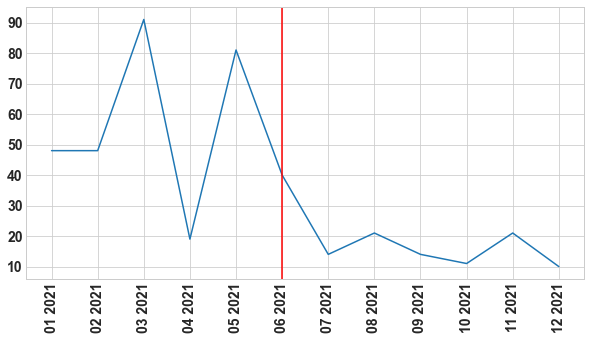


SUNNY


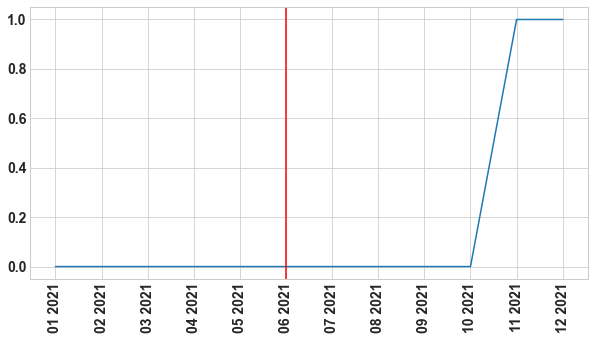


SURAJ


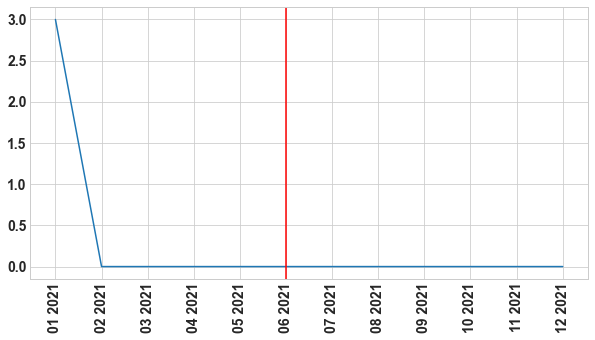


THARUN


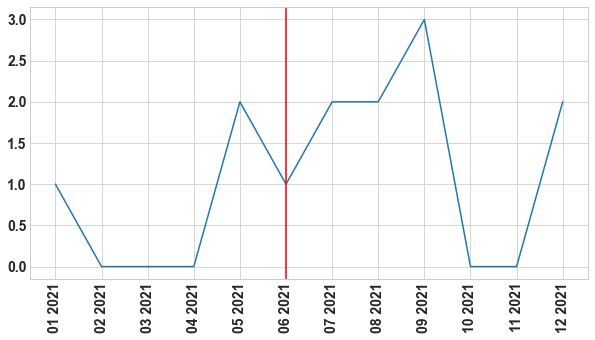


UMESH


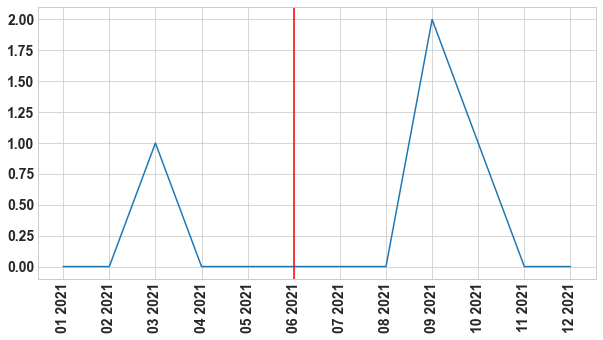


VEER


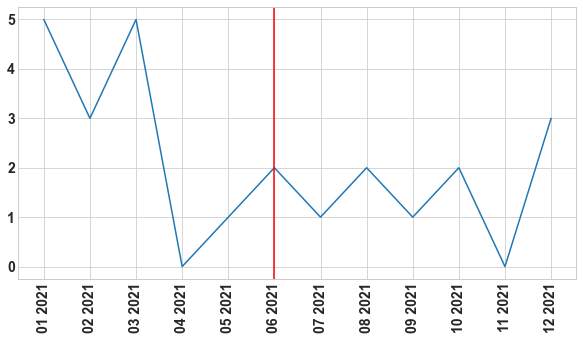


VISHAL


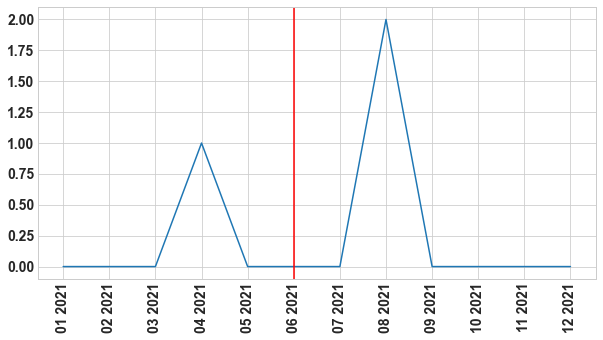


VISHNU


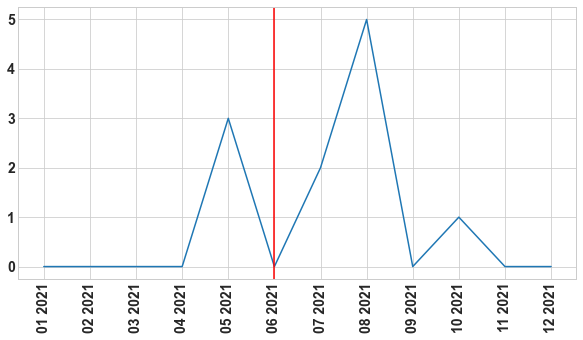


VISWA


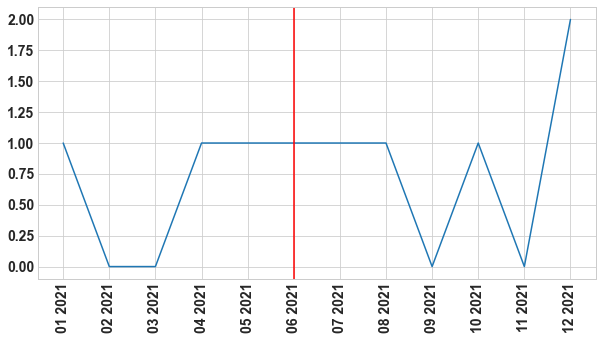


YAMINI


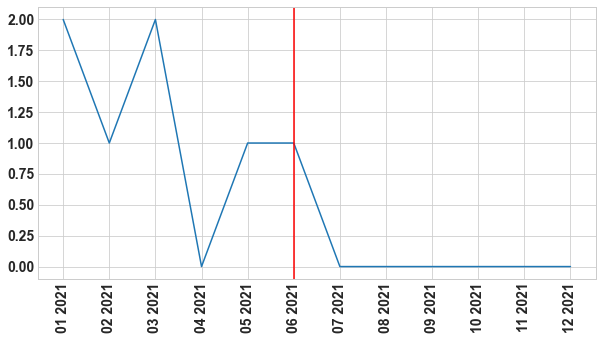


RAJU


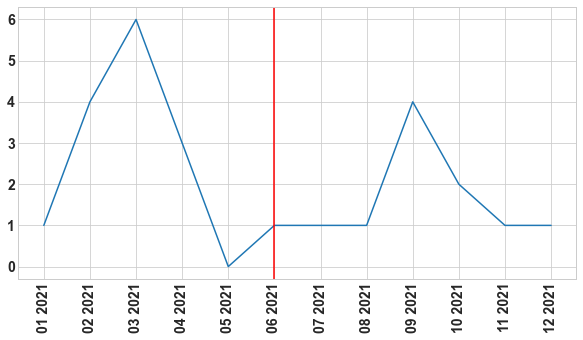

In [39]:
for i in at.columns:
    print(i.upper())
    plt.figure(figsize =(10,5))
    plt.plot(at[i])
    plt.axvline(x = '06 2021',color = 'red')
    plt.xticks(rotation = 90)
    plt.show()
    print()

In [1]:
x.columns

NameError: name 'x' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '01 2021'),
  Text(1, 0, '02 2021'),
  Text(2, 0, '03 2021'),
  Text(3, 0, '04 2021'),
  Text(4, 0, '05 2021'),
  Text(5, 0, '06 2021'),
  Text(6, 0, '07 2021'),
  Text(7, 0, '08 2021'),
  Text(8, 0, '09 2021'),
  Text(9, 0, '10 2021'),
  Text(10, 0, '11 2021'),
  Text(11, 0, '12 2021')])

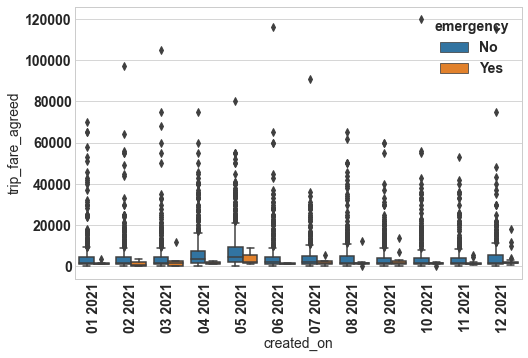

In [30]:
sns.boxplot(df_21['created_on'].dt.strftime('%m %Y').sort_values(),df_21['trip_fare_agreed'],hue =df_21['emergency'])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='trip_type', ylabel='trip_fare_agreed'>

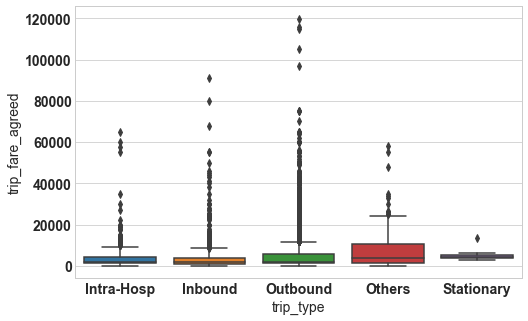

In [26]:
sns.boxplot(df['trip_type'],df['trip_fare_agreed'])

<AxesSubplot:xlabel='trip_distance_kms', ylabel='trip_fare_agreed'>

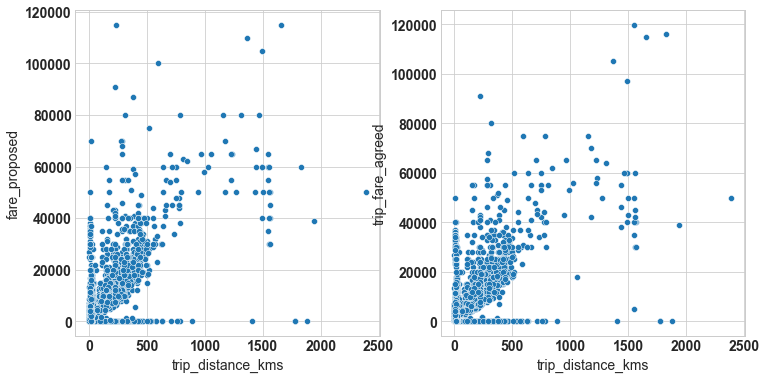

In [27]:
f= plt.figure(figsize=(12,6))

ax=f.add_subplot(121)
sns.scatterplot(df['trip_distance_kms'],df['fare_proposed'],ax=ax)


ax=f.add_subplot(122)
sns.scatterplot(df['trip_distance_kms'],df['trip_fare_agreed'],ax=ax)


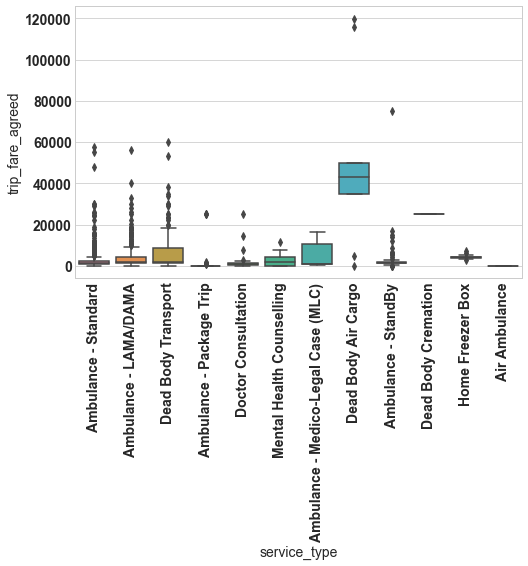

In [28]:
sns.boxplot(df['service_type'],df['trip_fare_agreed'])
ln = plt.gca()
ln.tick_params(axis='x', labelrotation = 90)
plt.show()


In [29]:
df.ambulance_ownership.value_counts(normalize = True)

Owned      0.646675
Partner    0.353325
Name: ambulance_ownership, dtype: float64

In [30]:
df.emergency.value_counts()

No     5646
Yes     180
Name: emergency, dtype: int64

In [31]:
df_emergency= df[df.emergency=='Yes']

In [32]:
df_not_emergency= df[df.emergency=='No']

<AxesSubplot:xlabel='system_fare'>

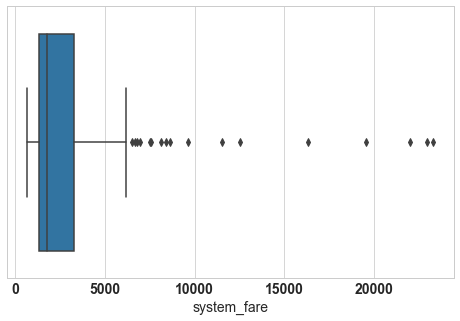

In [33]:
sns.boxplot(df_emergency.system_fare)

<AxesSubplot:xlabel='system_fare'>

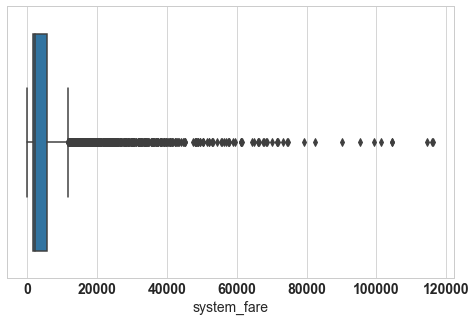

In [34]:
sns.boxplot(df_not_emergency.system_fare)

In [35]:
df_not_emergency.system_fare.median()

2164.5

In [31]:
df_june = df_21[(df_21['created_on'].dt.month == 6) | (df_21['created_on'].dt.month == 7) | (df_21['created_on'].dt.month == 8) |
     (df_21['created_on'].dt.month == 9) | (df_21['created_on'].dt.month == 10) | (df_21['created_on'].dt.month == 11)
     | (df_21['created_on'].dt.month == 12)]

In [32]:
df_june.shape

(2808, 30)

In [33]:
df_june_num = df_june.select_dtypes(include = np.number)
df_june_cat = df_june.select_dtypes(include = 'object')

DIFFERENT Months vs  estimated_distance_to_pickup_kms


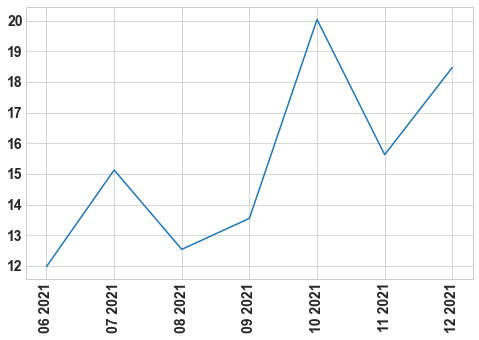

DIFFERENT Months vs  estimated_time_to_pickup_mins


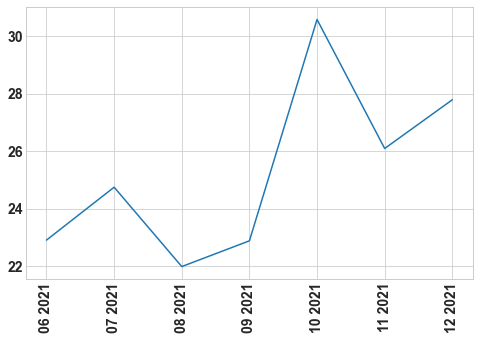

DIFFERENT Months vs  trip_distance_kms


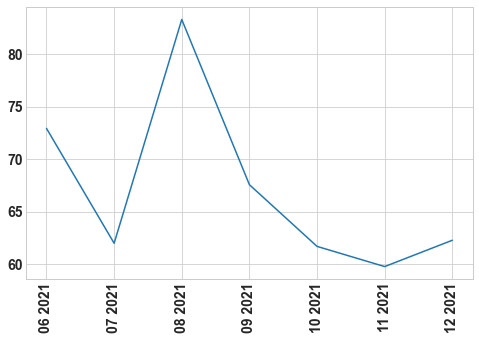

DIFFERENT Months vs  system_fare


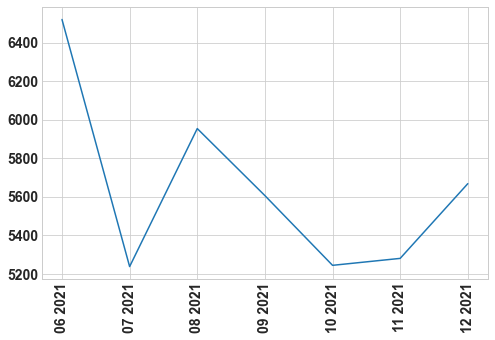

DIFFERENT Months vs  fare_proposed


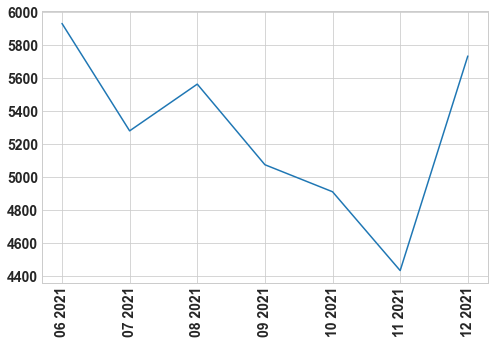

DIFFERENT Months vs  trip_fare_agreed


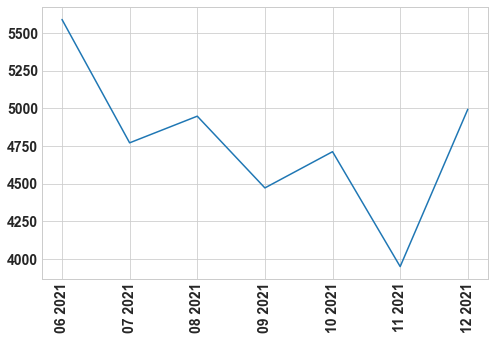

DIFFERENT Months vs  cost_to_owner


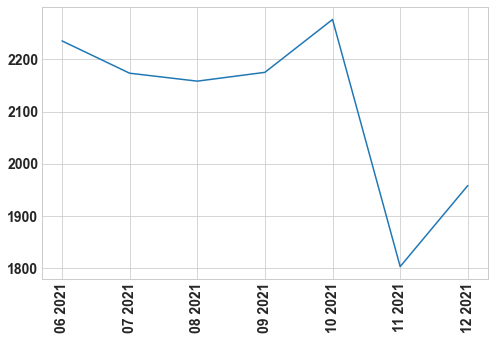

DIFFERENT Months vs  hospital_margin


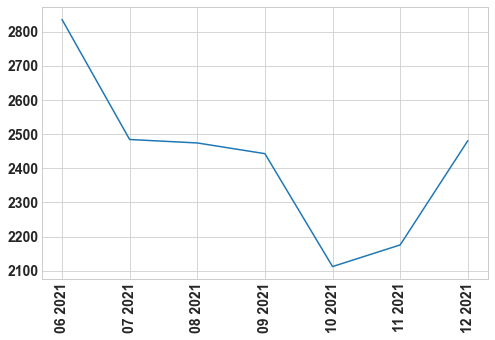

DIFFERENT Months vs  cancellation_amount_hospital


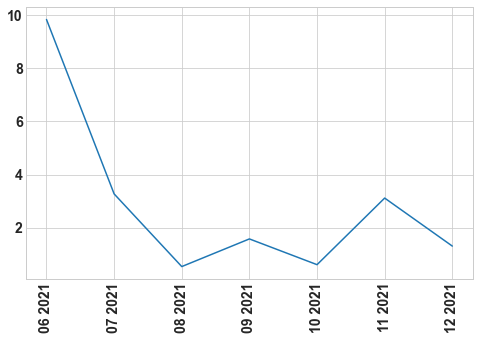

DIFFERENT Months vs  cancellation_amount_operator


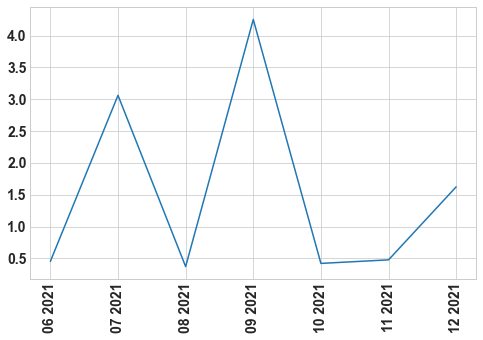

DIFFERENT Months vs  Revenue_Earned


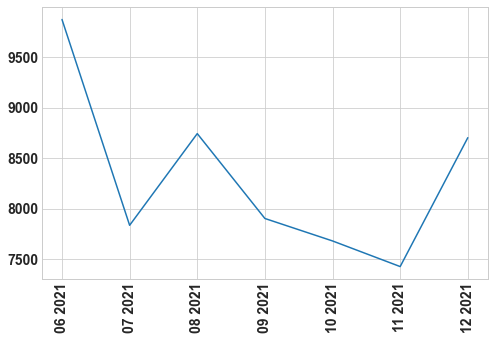

DIFFERENT Months vs  Total_cancellation


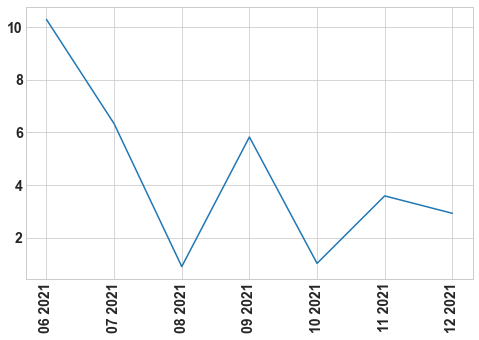

In [34]:
for i in df_june_num.columns:
    plt.plot(df_21.groupby(df_june['created_on'].dt.strftime('%m %Y'))[i].mean())
    plt.xticks(rotation = 90)
    print('DIFFERENT Months vs ',i)
    plt.show()

In [35]:
for i in df_june_cat.columns:
    print('Different Months vs ',i)
    x = pd.crosstab(df_june['created_on'].dt.strftime('%m %Y').sort_values(),df_june[i])
    print(x)
    print('\n\n')

Different Months vs  generated_by
generated_by  0  Akram  Anil  Azhar  Bijoy  Birender  Chawla  Dasari  Deven  \
created_on                                                                    
06 2021       0      1     1      0     70         1       0       4      0   
07 2021       0      0     0      0     89         0       0       0      0   
08 2021       1      2     1      0     95         0       1       4      0   
09 2021       0      2     1      0     89         0       0       3      0   
10 2021       0      0     0      0     75         1       0       2      0   
11 2021       1      2     1      1     78         2       0       1      0   
12 2021       0      5     0      0     28         2       1       1     77   

generated_by  Dhaval  ...  Srinu  Sunny  Tharun  Umesh  Veer  Vishal  Vishnu  \
created_on            ...                                                      
06 2021            1  ...     40      0       1      0     2       0       0   
07 2021       

ambulance_type_requested  ALS  EECO  Eeco  OMNI  Omni  TEMPO  Tempo
created_on                                                         
06 2021                    45   201    25    25     3     72     10
07 2021                    47   170    36    56     2     70      6
08 2021                    60   195    35    72     1     49      5
09 2021                    57   187    36    63     4     56      5
10 2021                    56   175    39    70     1     51      4
11 2021                    53   186    40    75     3     48      7
12 2021                    55   162    45    81     1     56      7



Different Months vs  ambulance_type_sent
ambulance_type_sent   -  BLR-BLS  ECO-BLS  ECO-MUV  ECO-TRN  OMN-BLS  OMN-FRZ  \
created_on                                                                      
06 2021              63        3       55       32       25        8        1   
07 2021              62        3       71       26       35        7        1   
08 2021             

In [36]:
df_june_cat.columns pd.crosstab

Index(['generated_by', 'agent_type', 'city', 'case_type', 'case_status',
       'trip_status', 'ambulance_status', 'medical_cause', 'emergency',
       'bill_to_hospital', 'source_name', 'ambulance_type_requested',
       'ambulance_type_sent', 'ambulance_company_id', 'ambulance_ownership',
       'trip_type', 'service_type'],
      dtype='object')

In [42]:
df_june['generated_by'].unique()

array(['Salman', 'Bijoy', 'Srinu', 'Farzan', 'Veer', 'Shubham', '0',
       'Santoshi', 'Birender', 'Reddy', 'Priyanka', 'Anil', 'Shantanu',
       'Narendra', 'raju', 'Kirti', 'Goenka', 'Sharma', 'Chawla',
       'Himanshu', 'Yamini', 'Vishnu', 'Parth', 'Dhaval', 'Jinal',
       'Dasari', 'Tharun', 'Akram', 'Viswa', 'Dora', 'Jagdish', 'Pooja',
       'Rakul', 'Kareena', 'Ismail', 'Goal', 'Poonam', 'Ram', 'Nikhil',
       'Krishna', 'Parit', 'Vishal', 'Malla', 'Umesh', 'Shivansh',
       'Hasmi', 'Emran', 'Mohd', 'Nagraj', 'Nir', 'Khusi', 'Hinet',
       'Honey', 'Azhar', 'Sunny', 'Deven'], dtype=object)

### Final Inferences : 
#### 1) Rapid Reduction in the Hospital margin. Here The assumption is we are receiving the margins from the hospitals.
#### 2) The estimated distance  vs the actucal distance of the trip had a huge difference. This could be because the inappropriate location of  pikup point . This difference there in , craetes am overhead expense of travel which is not being accounted
#### 3) The Total cancellation amount received through hospitals and operators are dropping 
#### 4) It  is welll known establised fact that change in workfore can impact the revenue of the company. The major change here has been the declining system fare rates propsed by the agents(new). 
#### 5)  Though the order count  from june has been pretty stagnant, but the orders follow a pattern . This includes trip distance in kms and trip fare agreed. The trip distance for the orders from june seems high ,which should respectively have higher fare price . But on the contrary the higher trip distance is resulting in low fare agreement . This is one of the reasons for the revenue to drop

### Some of the measures to improve the revenue : 
##### 1) Improving the technology to locate accurate pickup point and precise distance calculation in advance  : If the pickup points are not accurately located, this might create an additional  inconvenience of travel cost . To redce this better technology should be adopted that inturn will lead to create relative fare rates.
##### 2) Increase in the margins from the hospital : Assuming we are paid  from the hospitals for brining in the customers , the rate of margin should increase. Especially, In case if the type of order received is of  emergency  type, the margin from the hospital should be more.  Different margin rates should be imposed for different types of orders generated
##### 3) Imposing higher rates of cancellation fees: The rate of cancelling the order must be increased . This should relatively depend on distance travelled and additional expenses incurred for that particular order. There should not be one fit all  cancellation charge, it should be different for hospitals and clients ordered.
##### 4) Reasonable and strategical discounts should be alloted : Based on the order or patient history(including distance, frequency of orders , typefor which the order has been made.) if not personalized but reduction in fare prosed to fare agreed price should be employed.
##### 5) Negotiating with the third party ambulance partnering : This includes reducing the commission from 25% to 20% . This will not only fill the revenue deficit gap but also keeps up with idea of urgent ambulace services. 
